In [2]:
!pip install roboflow
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.7/91.7 kB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 7.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 91.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 141.1 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.11
    Uninstalling idna-3.11:
      Successfully uninstalled idna-3.11
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 31.7 MB/s eta 0:00:00


In [3]:
from roboflow import Roboflow
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [5]:
from google.colab import files
files.upload()   # choose the .zip

Saving final_pv_detection.v2i.yolov8.zip to final_pv_detection.v2i.yolov8.zip


{'final_pv_detection.v2i.yolov8.zip': b'PK\x03\x04\x14\x03\x00\x00\x08\x00B\xb85\\\xf6\x02!\xe6\x7f\x00\x00\x00\x9a\x00\x00\x00\x12\x00\x00\x00README.dataset.txte\xcc\xbb\x0e\xc2 \x14\x00\xd0\x9d\xaf\xb8\x893\xe5\x11\x1f\t\x83\x83]\x1d\x8c\x9bSC\xe16b(\x97\x00\xc5\xf8\xf7.n~\xc09;XB\xb2q\xca}\xf2\xd8\xd0\xb5@\t\xce\xa0\xa5>r\xa9\xb8V\xa0\x949\x9c\xf2\xca\x9e\xad\xe5j\x84\xd8R\xe8X*\x0e\x85fZ"\xbd\x07G\xabxY\xcf\xb1q\x8c\xe4\x03\x8a\xff\x93\xb1[\xa1\x1e<z\x98?`\xe1\xfe\xc3\xb0U,\xec\x1a\x1c\xa6\x8a\x06\xc6\x11.\x0f\xd8\x0f\x92\xb1/PK\x03\x04\x14\x03\x00\x00\x08\x00B\xb85\\4\x8ao7\t\x03\x00\x00@\x06\x00\x00\x13\x00\x00\x00README.roboflow.txt}T\xdb\xae\xd30\x10|\xcfW\xec\x0b\x88KS\xd2\x1e\xca\xe5H< \x04\x08\x04\x02\x01B\xf0\x84\x9cd\xdb\x18\x1c\xdb\xd8\x9b\x96\xf2U|\x03_\xc6\xd8iS(\x82JU\x1c{wvvv\x9cb\xad\xad2\x9f\xfc\xf6S\xcb\xc2\x8dhg\xa9\xa4\xed\x92\x96\xd5\xf2NY-\xca\xe5\x82\x16\x8b\xcb\xd5]\xdf\x17\x0f\xfe\xfb+\x8aw\x9d\x8e\xd4*Q\x91\x85v*\x12\x7f\xf3.\x08\xb7\xb4\xd5\x8a\x82\xab\xdd

In [6]:
!ls -lh /content

total 1.3M
-rw-r--r-- 1 root root 1.3M Jan 22 00:07 final_pv_detection.v2i.yolov8.zip
drwxr-xr-x 1 root root 4.0K Dec  9 14:42 sample_data


In [7]:
import zipfile, os

zip_path = "/content/final_pv_detection.v2i.yolov8.zip"   # change this
out_dir = "/content/roboflow_dataset"

os.makedirs(out_dir, exist_ok=True)

with zipfile.ZipFile(zip_path, 'r') as z:
    z.extractall(out_dir)

print("Extracted to:", out_dir)

Extracted to: /content/roboflow_dataset


Localize the data.yaml

In [8]:
!find /content/roboflow_dataset -maxdepth 3 -type f -name "data.yaml"

/content/roboflow_dataset/data.yaml


Verify the content of the following folder :

In [9]:
!ls /content/roboflow_dataset
!ls /content/roboflow_dataset/train
!ls /content/roboflow_dataset/valid


data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid
images	labels
images	labels


Num train images: 24


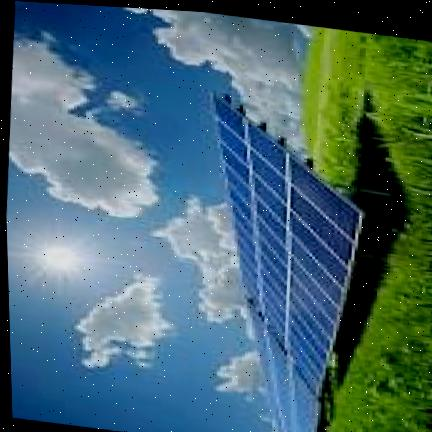

In [10]:
from pathlib import Path
from PIL import Image

root = Path(out_dir)
img_paths = sorted((root / "train" / "images").glob("*.*"))
print("Num train images:", len(img_paths))

Image.open(img_paths[0])

Verify the number of train label and check if ther is any missing label for the first 20 images

In [11]:
label_paths = sorted((root / "train" / "labels").glob("*.txt"))
print("Num train labels:", len(label_paths))

# check que chaque image a un label associé
missing = 0
for p in img_paths[:20]:
    txt = (root / "train" / "labels" / (p.stem + ".txt"))
    if not txt.exists():
        missing += 1
print("Missing labels in first 20 images:", missing)


Num train labels: 24
Missing labels in first 20 images: 0


In [12]:
import os
for r, d, f in os.walk("/content/roboflow_dataset"):
    if r.endswith("images"):
        print(r, "->", len(f), "files")

/content/roboflow_dataset/test/images -> 1 files
/content/roboflow_dataset/valid/images -> 7 files
/content/roboflow_dataset/train/images -> 24 files


Verify also the number of label. Compare it with the number of images to check if there is any missing labels



In [13]:
for r, d, f in os.walk("/content/roboflow_dataset"):
    if r.endswith("labels"):
        print(r, "->", len(f), "files")


/content/roboflow_dataset/test/labels -> 1 files
/content/roboflow_dataset/valid/labels -> 7 files
/content/roboflow_dataset/train/labels -> 24 files


If data are not dowload from a zip : download from Roboflow

In [ ]:
rf = Roboflow(api_key="1UEzOWbI3C0N1Tq8xPOe")
project = rf.workspace("savoie").project("usmb")

print(f"Available versions for project '{project.name}':")
for v in project.versions():
    print(f"- Version {v.version}: {v.name}")

# IMPORTANT: After seeing the available versions, please replace <YOUR_VALID_VERSION_NUMBER_OR_NAME_HERE> with a valid one.
# For example: version = project.version(1) or version = project.version('my_dataset_v1')
# Then uncomment the following two lines:
# version = project.version(<YOUR_VALID_VERSION_NUMBER_OR_NAME_HERE>)
# dataset = version.download("yolov11")

loading Roboflow workspace...
loading Roboflow project...
Available versions for project 'USMB':


In [14]:
# carregar modelo maior
model = YOLO("yolo11l-seg.pt")

# treinar
model.train(
    data="/content/roboflow_dataset/data.yaml", #my datas unzip
    epochs=50, #We don't have many images, no need of many epochs
    imgsz=640,
    batch=16,
    patience=10, #early stopping
    workers=8,
    project="detect_panel_train",  #dossier de sortie
    name="exp_highres"
)


Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/roboflow_dataset/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolo11l-seg.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=exp_highres, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=10, perspective=

ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c6278c1d520>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)', 'Precision-Recall(M)', 'F1-Confidence(M)', 'Precision-Confidence(M)', 'Recall-Confidence(M)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041, 

In [16]:
metrics = model.val()
print(metrics)

Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1534.0±394.4 MB/s, size: 41.4 KB)
val: Scanning /content/roboflow_dataset/valid/labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 7/7 1.8Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.7it/s 0.6s
                   all          7          9      0.872      0.778      0.858      0.745      0.991      0.889      0.889       0.69
Speed: 1.8ms preprocess, 51.1ms inference, 0.0ms loss, 3.0ms postprocess per image
Results saved to /content/runs/segment/val2
ultralytics.utils.metrics.SegmentMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7c61d72c4ec0>
curves: ['Precision-Recall(B)', 'F1-Confidence(

metrics plus claires

In [19]:
from ultralytics import YOLO

best_path = "/content/runs/segment/detect_panel_train/exp_highres/weights/best.pt"
model_best = YOLO(best_path)

metrics = model_best.val(data="/content/roboflow_dataset/data.yaml")
print("✅ Evaluation done")

# Affichage clair
print("BOX  - P:", metrics.box.mp, "R:", metrics.box.mr, "mAP50:", metrics.box.map50, "mAP50-95:", metrics.box.map)
print("MASK - P:", metrics.seg.mp, "R:", metrics.seg.mr, "mAP50:", metrics.seg.map50, "mAP50-95:", metrics.seg.map)


Ultralytics 8.4.7 🚀 Python-3.12.12 torch-2.9.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
YOLO11l-seg summary (fused): 204 layers, 27,585,363 parameters, 0 gradients, 131.8 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1387.7±218.7 MB/s, size: 39.3 KB)
val: Scanning /content/roboflow_dataset/valid/labels.cache... 7 images, 0 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 7/7 2.4Mit/s 0.0s
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 1/1 1.7it/s 0.6s
                   all          7          9      0.872      0.778      0.858      0.745      0.991      0.889      0.889       0.69
Speed: 2.5ms preprocess, 49.1ms inference, 0.0ms loss, 2.9ms postprocess per image
Results saved to /content/runs/segment/val3
✅ Evaluation done
BOX  - P: 0.8717659674019274 R: 0.7777777777777778 mAP50: 0.8576259946949601 mAP50-95: 0.7451050561183388
MASK - P: 0.990884588704273 R: 0.8888888888888888 mAP50: 0

In [20]:
import matplotlib.pyplot as plt

# Renomear as chaves para algo mais curto
labels_map = {
    "metrics/precision(B)": "Precision (B)",
    "metrics/recall(B)": "Recall (B)",
    "metrics/mAP50(B)": "mAP50 (B)",
    "metrics/mAP50-95(B)": "mAP50-95 (B)",
    "metrics/precision(M)": "Precision (M)",
    "metrics/recall(M)": "Recall (M)",
    "metrics/mAP50(M)": "mAP50 (M)",
    "metrics/mAP50-95(M)": "mAP50-95 (M)",
    "fitness": "Fitness"
}

# Usar labels simplificados
keys = list(metrics_dict.keys())
values = list(metrics_dict.values())
labels = [labels_map.get(k, k) for k in keys]

# Plot
plt.figure(figsize=(8,5))
plt.bar(labels, values)
plt.xticks(rotation=45, ha="right")
plt.ylabel("Valor")
plt.title("Métricas de Validação YOLOv11")
plt.tight_layout()
plt.show()

NameError: name 'metrics_dict' is not defined

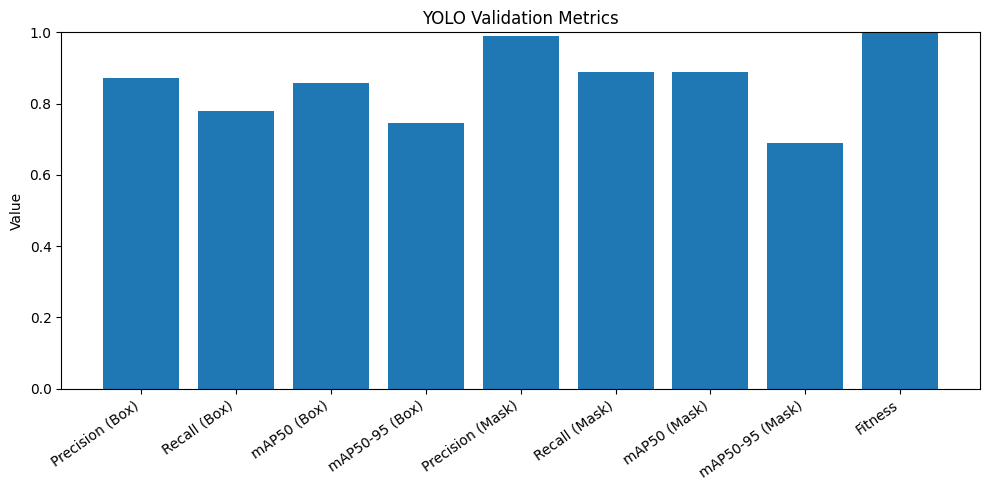

In [23]:
import matplotlib.pyplot as plt

# metrics = model_best.val(...)  # tu l'as déjà

metrics_dict = {
    "metrics/precision(B)": float(metrics.box.mp),
    "metrics/recall(B)": float(metrics.box.mr),
    "metrics/mAP50(B)": float(metrics.box.map50),
    "metrics/mAP50-95(B)": float(metrics.box.map),
    "metrics/precision(M)": float(metrics.seg.mp),
    "metrics/recall(M)": float(metrics.seg.mr),
    "metrics/mAP50(M)": float(metrics.seg.map50),
    "metrics/mAP50-95(M)": float(metrics.seg.map),
    "fitness": float(metrics.fitness) if hasattr(metrics, "fitness") and metrics.fitness is not None else None,
}

# Nettoyage : enlever fitness si None
metrics_dict = {k: v for k, v in metrics_dict.items() if v is not None}

labels_map = {
    "metrics/precision(B)": "Precision (Box)",
    "metrics/recall(B)": "Recall (Box)",
    "metrics/mAP50(B)": "mAP50 (Box)",
    "metrics/mAP50-95(B)": "mAP50-95 (Box)",
    "metrics/precision(M)": "Precision (Mask)",
    "metrics/recall(M)": "Recall (Mask)",
    "metrics/mAP50(M)": "mAP50 (Mask)",
    "metrics/mAP50-95(M)": "mAP50-95 (Mask)",
    "fitness": "Fitness",
}

keys = list(metrics_dict.keys())
values = list(metrics_dict.values())
labels = [labels_map.get(k, k) for k in keys]

plt.figure(figsize=(10,5))
plt.bar(labels, values)
plt.xticks(rotation=35, ha="right")
plt.ylim(0, 1)  # métriques entre 0 et 1
plt.ylabel("Value")
plt.title("YOLO Validation Metrics")
plt.tight_layout()
plt.show()


In [ ]:
results = model.predict("images.jpg", save=True)

# Mostrar máscaras detectadas
results[0].plot()

In [24]:
!ls

final_pv_detection.v2i.yolov8.zip  runs		yolo11l-seg.pt
roboflow_dataset		   sample_data	yolo26n.pt


Test on 1 image and qualitative result

Test images found: 1 [PosixPath('/content/roboflow_dataset/test/images/006_jpeg.rf.4ca14585fc0af5518682b91886f5d0c1.jpg')]

image 1/1 /content/roboflow_dataset/test/images/006_jpeg.rf.4ca14585fc0af5518682b91886f5d0c1.jpg: 640x640 1 Solar_panel, 58.1ms
Speed: 3.1ms preprocess, 58.1ms inference, 16.6ms postprocess per image at shape (1, 3, 640, 640)


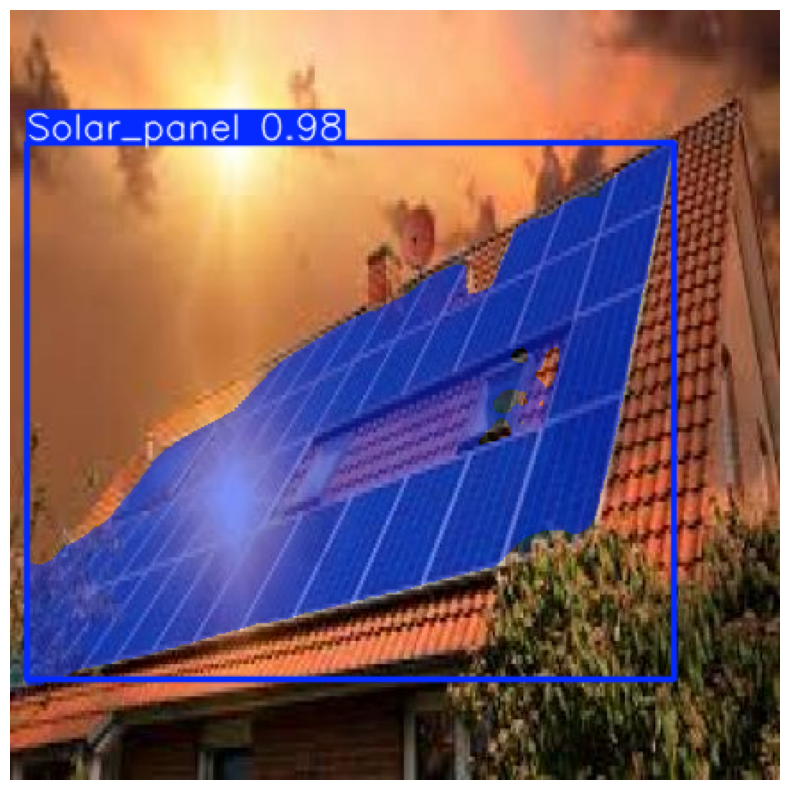

In [21]:
from ultralytics import YOLO
from pathlib import Path
import matplotlib.pyplot as plt

best = YOLO("/content/runs/segment/detect_panel_train/exp_highres/weights/best.pt")

test_dir = Path("/content/roboflow_dataset/test/images")
test_imgs = sorted(test_dir.glob("*.*"))
print("Test images found:", len(test_imgs), test_imgs)

img = str(test_imgs[0])  # ta seule image
results = best.predict(source=img, conf=0.25)

# Affichage
annotated = results[0].plot()  # numpy array (BGR)
plt.figure(figsize=(10,10))
plt.imshow(annotated[:, :, ::-1])  # BGR -> RGB
plt.axis("off")
plt.show()
